# <font size=8>分类算法三：决策树<font>

## <font size=6><mark style=background-color:pink>一、认识决策树<mark><font>
<font size=4>

**引例**
    
比如母亲想给女儿介绍男朋友，也就是去相亲，女儿要母亲先简单描述一下相亲对象再决定自己要不要去见，其实相当于将这个相亲对象分为自己感兴趣的类型和自己不感兴趣的类型又或者是备用人选

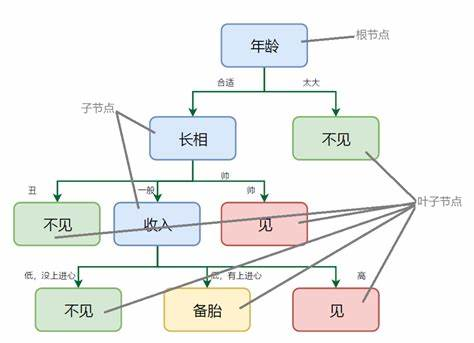    
    
可以理解为决策树就是一套判断逻辑，将所有的相亲对象按照这套判断逻辑进行分类，最终所有的相亲对象都只属于{'见'，'不见'，'备胎'}这三类中的一类 
    
**决策树的组成**

决策树由结点（node）和有向边（directed edge）组成，树中包含三种结点：
- 根节点（root node）：包含样本全集。没有⼊边，但有零条或多条出边
- 内部节点（internal node）：对应于属性测试条件，恰有⼀条⼊边，和一条或多条出边，只包含样本全集的一部分
- 叶子节点（leaf node）或终结点（terminal node）：对应于决策结果，恰有⼀条⼊边，但没有出边，只包含样本全集的一部分
  
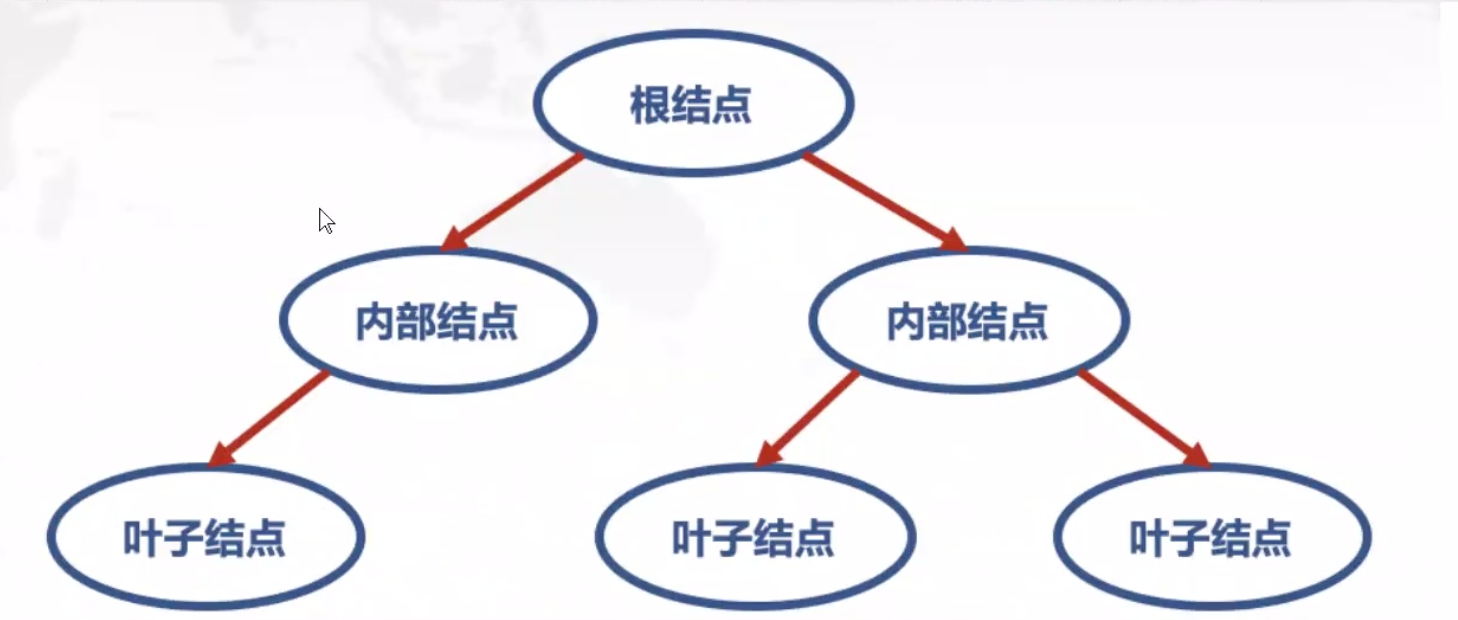    
    
除此之外：
- 父节点：若一个节点含有子节点，则这个节点称为其子节点的父节点
- 子节点：一个节点含有的子树的根节点称为该节点的子节点
- 兄弟节点：具有相同父节点的节点互称为兄弟节点
- 节点的层次：从根开始定义起，根为第1层，根的子节点为第2层，以此类推
- 树的高度（深度）：树中节点的最大层次
- 节点的度：一个节点含有的子树的个数称为该节点的度
- 树的度：一棵树中，最大的节点的度称为树的度
    
**决策树的类型**
- 最终目的是为了分类，即目标值离散：分类树
- 最终目的是为了预测，即目标值连续：回归树

## <font size=6><mark style=background-color:pink>二、分类决策树<mark><font>
<font size=4>
    
**引例**
    
银行贷款数据如下，现在如果有一个顾客想办理银行贷款，已知他的年龄，工作情况，房产情况以及信贷情况，如何去判断他是否能得到贷款？

    
|ID|年龄|有工作|有自己的房子|信贷情况|类别|
|--|----|-----|-----------|-------|----|
|1|青年|0|0|一般|否|
|2|青年|0|0|好|否|
|3|青年|1|0|好|是|
|4|青年|1|1|一般|是|
|5|青年|0|0|一般|否|
|6|中年|0|0|一般|否|
|7|中年|0|0|好|否|
|8|中年|1|1|好|是|
|9|中年|0|1|非常好|是|
|10|中年|0|1|非常好|是|
|11|老年|0|1|非常好|是|
|12|老年|0|1|好|是|
|13|老年|1|1|好|是|
|14|老年|1|0|非常好|是|
|15|老年|0|0|一般|否|




- 这是一个分类问题，相当于根据顾客的特征值(年龄、工作情况、房产情况、信贷情况)，将他分类到{'是'(发放贷款)，'否'(不发放贷款)}两类中的一类，那么我们就可以考虑构建分类树来实现，但是我们应当如何构建分类树？
    
- 首先，树的构建，应当由已知标签的训练集来构建，也就是通过一系列的对"特征值"的判断，最后将已知标签的训练集中的样本分到各个叶子结点中去
    
- <font color=red>我们肯定希望，每个叶子节点上分到的样本标签最好都一样，也就是都是'是'(发放贷款)，或者都是'否'(不发放贷款)<font>
    
- 因为这说明，我们的判断规则是准确的
    
- 那当一个未知标签的新样本，经过对其"特征值"的判断，我们就可以把他划分到某一个叶子节点中，并由叶子节点中的样本的标签来决定这个新样本的标签
    
- 分类树的每个叶子节点都包含训练集中的一部分样本，要叶子节点上的样本都属于同一标签事实上属于过于理想的状态
    
- 我们只能尽可能希望，当样本分至叶子节点时，<font color=red>对其标签判断的"不确定性"较低<font>
    
**不确定性|不纯度**

就二分类的情况来讨论纯度的概念
- 假设给你一袋子十个球，形状大小都一样，但是颜色不一样，分为黑色和白色
- 那么当黑色球5个，白色球5个的时候，也是就白色类的概率和黑色类的概率相等都为1/2的时候
- 你对于抽出来的球是什么颜色最不确定，这个时候集合"最不纯"
- 如果不好理解，那就换成7个黑色球，3个白色球，那么你大概会觉得自己抽到黑色球的概率更大
- 这个时候也可以理解为黑色的纯度"比较高"，这个袋子里的球的不纯度也比5黑5白时低一点
- 不纯可以理解为"不确定性"
    
就多分类的情况来讨论纯度的概念
- 还是拿一袋子十五个球举例，形状大小都一样
- 但是颜色有三中，红、蓝、绿，每个颜色的球5个
- 那么这个时候你对于抽出来的球是什么颜色最不确定，因为这个时候三色球的概率都是一样的1/3
- 所以在多分类的情况下，比如样本集合类里有N个类别，如果每个类别的概率一样为1/N时，这个样本集合"最不纯"
    
**不确定性度量|不纯度量**

前面对不确定性|不纯度的讨论，都是一种直观的感觉，现在我们需要用数学语言，将其有个数学量的表达，这就是不确定性度量|不纯度量：Φ

二分类情况下的不纯度量 Φ(P,1-P) | Φ(P_a,P_b)
- 假设样本集合里有两类不同的样本，A类和B类
- A类的概率为P
- 因为是二分类问题，不是A就是B，所以B类的概率为1-P
- 由前面的讨论已经知道当A、B的概率相同即都为1/2的时候，这个时候样本集合最不纯
- 当A的概率为1或者B的概率为1时，样本集合纯度最高，不纯度最低，为0
- 所以用来度量不纯度的不纯度量应当满足：
- A、B概率相等的时候，不纯度量达到最大值
- A、B其中一个概率为1时，不纯度量都为0
- A、B其他任何概率分布，不纯度都没有A、B概率相等时高
    
在二分来情况下，满足以上条件的不纯度量有以下几种：

①香农熵
- Φ(P,1-P)= P_a[-log_2(P_a)]+P_b[-log_2(P_b)]=P[-log_2(P)]+(1-P)[-log_2(1-P)]

②基尼系数
- Φ(P,1-P)= P_a[1-(P_a)]+P_b[1-(P_b)]
    
③误分类误差
- Φ(P,1-P)= 1-max(P_a,P_b)
    
在二分类的基础上，推广至多分类情况下（N个类）的不纯度量：

①香农熵
- $Φ(P_{1},....,P_{k},....P_{N})= \sum_{i=1}^{N} P_{i}*[-log_2(P_{i})]$

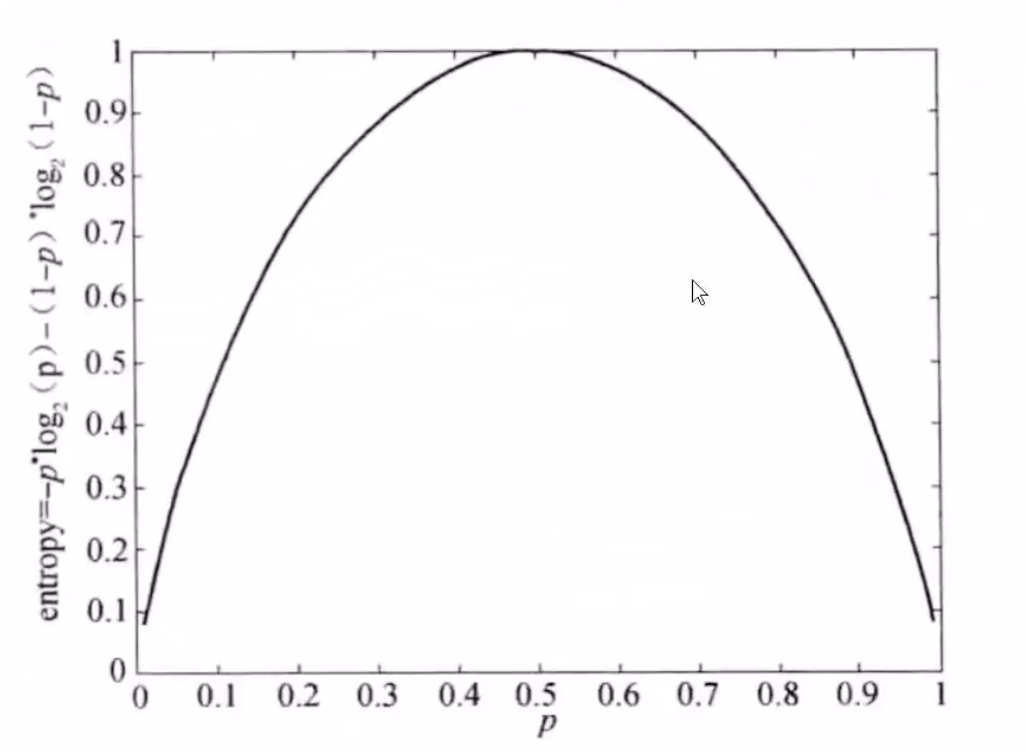    
    
②基尼系数
- $Φ(P_{1},....,P_{k},....P_{N})= \sum_{i=1}^{N} P_{i}*(1-P_{i})$
    
③误分类误差
- $Φ(P_{1},....,P_{k},....P_{N})=1-max_{1,...,N}(P_{i})$

**信息增益** 
    
现在假设有K个特征，N个类别，决策树是按照特征来生成树的根节点、中间节点以及后面最后的叶子节点
    
问题是如何选取特征来作为第一个、第二个、第三个、...节点，最后得到叶子节点形成树
    
我们希望的是最后每个叶子节点所包含的样本集合纯度比较高，所以树的生长过程其实也是降低信息不确定性的一个过程
    
每一个父节点到子节点，我们想要不纯度下降的非常快，那以**香农熵**举例，这里就涉及到一个概念，叫做<font color=red>信息增益<font>
    
这里我们先不直接拿出信息增益的概念和计算公式等，我们先返回最开始的例题来看这个信息增益是什么东西
    
|ID|年龄|有工作|有自己的房子|信贷情况|类别|
|--|----|-----|-----------|-------|----|
|1|青年|0|0|一般|否|
|2|青年|0|0|好|否|
|3|青年|1|0|好|是|
|4|青年|1|1|一般|是|
|5|青年|0|0|一般|否|
|6|中年|0|0|一般|否|
|7|中年|0|0|好|否|
|8|中年|1|1|好|是|
|9|中年|0|1|非常好|是|
|10|中年|0|1|非常好|是|
|11|老年|0|1|非常好|是|
|12|老年|0|1|好|是|
|13|老年|1|1|好|是|
|14|老年|1|0|非常好|是|
|15|老年|0|0|一般|否|

可以看到整个样本集(训练集)D中：有9个'是'，有6个'否'

则整个样本集的不纯度为：$H(D)=\frac{9}{15}*[-log_2(\frac{9}{15})]+\frac{6}{15}*[-log_2(\frac{6}{15})]$
    
我们随机抽取从所有特征('年龄'，'工作情况'，'房产情况'，'信贷情况')中**随意**抽取一个特征'年龄'，来作为分类决策树的第一个节点，也就是根节点

则样本集分为三个子集：青年集(1-5)，中年集(6-10)，老年(11-15)

青年集：有2个'是'，有3个'否'

则青年集的不纯度为：$H(青年)=\frac{2}{5}*[-log_2(\frac{2}{5})]+\frac{3}{5}*[-log_2(\frac{3}{5})]$
    
中年集：有3个'是'，有2个'否'

则中年集的不纯度为：$H(中年)=\frac{3}{5}*[-log_2(\frac{3}{5})]+\frac{2}{5}*[-log_2(\frac{2}{5})]$
    
老年集：有4个'是'，有1个'否'
    
则老年集的不纯度为：$H(老年)=\frac{4}{5}*[-log_2(\frac{4}{5})]+\frac{1}{5}*[-log_2(\frac{1}{5})]$
    
这三个子集的总共的**加权**不纯度为：$H(D|年龄)=\frac{5}{15}*np_1+\frac{5}{15}*np_2+\frac{5}{15}*np_3$

那么这个加权不纯度$H(D|年龄)$就被我们称为<font color=red>条件熵<font>
    
而在已知'年龄'下的**信息增益**则为$H(D)-H(D|年龄)$，也就是已知'年龄'下，减少的'不确定性'
    
那么现在换做选取别的特征('工作情况'，'房产情况'，'信贷情况')，同样可以计算出已知'工作情况'下的信息增益，已知'房产情况'下的信息增益以及已知'信贷情况'下的信息增益
    
那么已知每个特征下的信息增益有大有小，我们肯定选择信息增益最大的特征那个作为决策树的第一个节点也就是根节点，因为它对于分类的不确定性减少的最多

接下来的节点划分也是一样，再在剩余的特征中选取信息增益最大的特征作为节点，如此往复，直到所有特征都用完，或者叶子节点中所包含的样本数低于某个阈值时，分类决策树停止生长

那么以上是针对不纯度量香农熵来讨论的，但对于其他的不纯度量，决策树的建树思路其实是一样的

## <font size=6><mark style=background-color:pink>三、常见决策树生成算法<mark><font>

### 1.ID3算法

ID3算法的核⼼是在决策树各个节点应⽤信息增益准则选择特征，递归地构建决策树。具体⽅法是：
* 从根节点开始，对结点计算所有可能的特征的信息增益
* 选择信息增益最⼤的特征作为结点的特征，由该特征的不同取值建⽴⼦节点
* 再对⼦节点调⽤以上⽅法，构建决策树
* 直到所有特征的信息增益均很⼩或没有特征可以选择为⽌，最后得到⼀个决策树

ID3算法局限主要源于局部最优化条件，即信息增益的计算⽅法，其局限性主要有以下⼏点：
* 分⽀度越⾼（分类⽔平越多）的离散变量往往⼦节点的总信息熵更⼩，ID3是按照某⼀列进⾏切
分，有⼀些列的分类可能不会对结果有⾜够好的指示。极端情况下取ID作为切分字段，每个分类的
纯度都是100%，因此这样的分类⽅式是没有效益的。(**最开始就偏向分类水平高的特征，容易让模型过拟合**)
* 不能直接处理连续型变量，若要使⽤ID3处理连续型变量，则⾸先需要对连续变量进⾏离散化。
* 对缺失值较为敏感，使⽤ID3之前需要提前对缺失值进⾏处理。
* 没有剪枝的设置，容易导致过拟合，即在训练集上表现很好，测试集上表现很差

### 2.C4.5算法

### 3.CART